# 04_evaluation

In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("featured_data.csv")

In [2]:
X = df.drop(columns='Time_taken(min)')
y = df['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Load saved models
lr_model = joblib.load("linear_regression_model.pkl")
rf_model = joblib.load("random_forest_model.pkl")


In [5]:
# 1. Evaluate Linear Regression
# =========================

lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("----- Linear Regression -----")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R²:", lr_r2)
print()


----- Linear Regression -----
MAE: 5.0271487195075615
MSE: 40.55815860491156
R²: 0.5382262522959873



In [7]:
# 2. Evaluate Random Forest
# =========================

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("----- Random Forest -----")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R²:", rf_r2)
print()


----- Random Forest -----
MAE: 3.047325433220596
MSE: 14.397139593548154
R²: 0.8360817814464224



In [9]:
# 3. Compare both models
# =========================

print("===== MODEL COMPARISON =====")
print(f"Linear Regression → MAE: {lr_mae:.4f}, R²: {lr_r2:.4f}")
print(f"Random Forest     → MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")
print()

if rf_mae < lr_mae and rf_r2 > lr_r2:
    print("🎉 Random Forest performs better and will be used for prediction.")
else:
    print("Linear Regression performs better (unexpected).")

===== MODEL COMPARISON =====
Linear Regression → MAE: 5.0271, R²: 0.5382
Random Forest     → MAE: 3.0473, R²: 0.8361

🎉 Random Forest performs better and will be used for prediction.


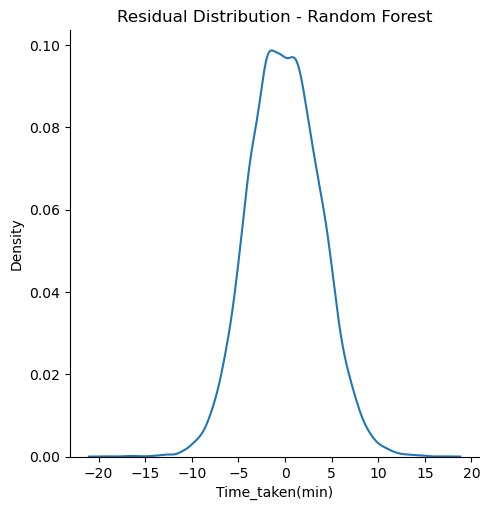

In [11]:
# 4. Residual Plot (RF)
# =========================

rf_residuals = y_test - rf_pred
sns.displot(rf_residuals, kind='kde')
plt.title("Residual Distribution - Random Forest")
plt.show()
